# Module 6. Het verband tussen 2 kwantitatieve variabelen (regressie)

In [1]:
# Importeren van de nodige packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basis visualisatie
from statsmodels.graphics.mosaicplot import mosaic  # Mozaïekdiagram
import seaborn as sns                               # Geavanceerde datavisualisatie
import altair as alt                                # Een alternatief visualisatiesysteem

## De kleinste kwadratenmethode: uitgewerkte berekening

Voor de introductie van lineaire regressie en de kleinste kwadratenmethode nemen we als voorbeeld de data die we ook in de slides gebruiken:

In [24]:
# Dataset met voorbeeldwaarden:
weight_gain = pd.DataFrame(
    np.array(
        [[0, 177],
         [10, 231],
         [20, 249],
         [30, 348],
         [40, 361],
         [50, 384],
         [60, 404]]),
    columns=['x', 'y'])
weight_gain


,x,y
0,0,177
1,10,231
2,20,249
3,30,348
4,40,361
5,50,384
6,60,404


Een plot van deze casus:

<AxesSubplot:xlabel='x', ylabel='y'>

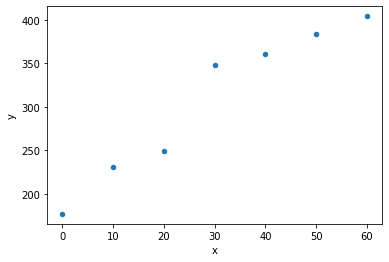

In [22]:
weight_gain.plot(kind='scatter', x='x', y='y')

We proberen deze verzameling van punten $(x_i, y_i)$ (voor $i: 1, \ldots, n$) zo goed mogelijk te benaderen met een rechte $\hat{y} = \beta_0 + \beta_1 x$. Het symbool $\hat{y}$ betekent "een schatting voor $y$". De parameters $\beta_0$ en $\beta_1$ worden als volgt berekend:

$\beta_1 = \frac{\sum_{i=1}^{n}(x_i - \overline{x})(y_i - \overline{y})}{\sum_{i=1}^{n}(x_i - x)^2}$

$\beta_0 = \overline{y} - \beta_1 \overline{x}$

In Python kan je dat als volgt uitrekenen: 

In [25]:
mx = weight_gain.x.mean()
my = weight_gain.y.mean()

print("x̅ = %.4f" % mx)
print("y̅ = %.4f" % my)

weight_gain['xx'] = weight_gain.x - mx
weight_gain['yy'] = weight_gain.y - my

weight_gain

x̅ = 30.0000
y̅ = 307.7143


,x,y,xx,yy
0,0,177,-30.0,-130.714286
1,10,231,-20.0,-76.714286
2,20,249,-10.0,-58.714286
3,30,348,0.0,40.285714
4,40,361,10.0,53.285714
5,50,384,20.0,76.285714
6,60,404,30.0,96.285714


In [29]:
beta_1 = (weight_gain.xx * weight_gain.yy).sum() / (weight_gain.xx**2).sum()
beta_0 = my - beta_1 * mx

print("Functievoorschrift regressierechte: y = %.4f + %.4f x" %
    (beta_0, beta_1))

Functievoorschrift regressierechte: y = 189.9643 + 3.9250 x


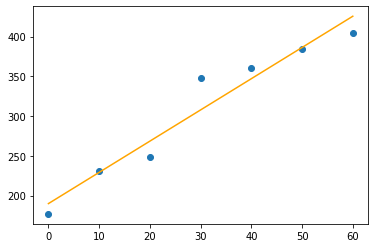

In [42]:
fig, tplot = plt.subplots(1, 1)
tplot.scatter(weight_gain.x, weight_gain.y)

# (x,y) coördinaten om de regressierechte te tekenen
# (je hebt er maar 2 nodig)
xvals = np.linspace(0, 60, num=2)
yvals = beta_0 + xvals * beta_1

tplot.plot(xvals, yvals, color='orange')

## Regressie-analyse in Python

Uiteraard bestaan er ook hiervoor al functies in Python, wij hoeven de parameters voor de regressierechte niet telkens via de formule uit te rekenen.

Als casus lezen we de [Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/) dataset in. Meer info over de dataset vind je op de [website](https://allisonhorst.github.io/palmerpenguins/), of in de [beschrijving](../data/penguins.md).

In [55]:
# CSV-bestand penguins_size.csv laden
penguins = pd.read_csv('../data/penguins_size.csv')
# penguins.head()
# Categorische variabelen aanduiden
penguins.species = penguins.species.astype('category')
penguins.sex = penguins.sex.astype('category')
penguins.island = penguins.island.astype('category')
penguins.dropna(inplace=True)
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


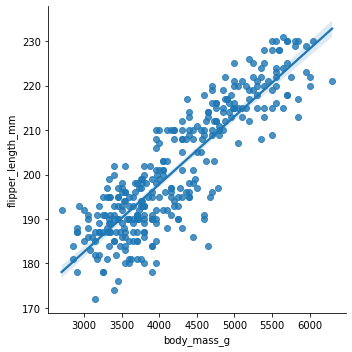

In [56]:
sns.lmplot(data=penguins, x='body_mass_g', y='flipper_length_mm')

In [57]:
penguins.body_mass_g

0      3750.0
1      3800.0
2      3250.0
4      3450.0
5      3650.0
        ...  
338    4925.0
340    4850.0
341    5750.0
342    5200.0
343    5400.0
Name: body_mass_g, Length: 334, dtype: float64

In [62]:
mass_flipper = stats.linregress(x=penguins.body_mass_g, y=penguins.flipper_length_mm)

print(mass_flipper)
print('----------')
print("Regression line: flipper_length = %.4f + %.4f x body_mass" %
    (mass_flipper.intercept, mass_flipper.slope))
print("Correlation coefficient: %.4f" % mass_flipper.rvalue)
print("Determination coefficient: %.4f" % mass_flipper.rvalue**2)

LinregressResult(slope=0.015213428794921394, intercept=136.98078282748392, rvalue=0.8732109665376445, pvalue=1.1494028649077907e-105, stderr=0.0004659862203516556, intercept_stderr=1.996792096596842)
----------
Regression line: flipper_length = 136.9808 + 0.0152 x body_mass
Correlation coefficient: 0.8732
Determination coefficient: 0.7625


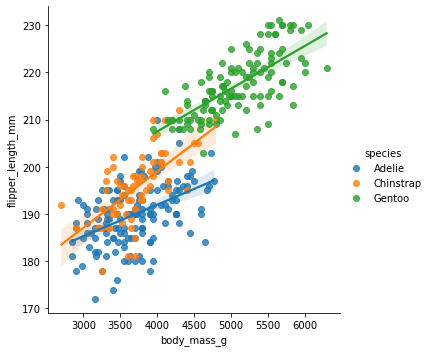

In [47]:
# Opgesplitste per soort:
sns.lmplot(data=penguins, hue='species', x='body_mass_g', y='flipper_length_mm')